# Bayesian Statistics

##### Keywords: bayesian,  normal-normal model, MAP,  MCMC

In [49]:
%matplotlib inline
import numpy as np
import scipy as  sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")

## Frequentist Statistics

In frequentist approach, a parameter estimate is computed by using some function on the data $D$. 
In the world of frequentist there is a true value of the parameter, which is fixed, however  the data are random. 

In other words, assuming that a given distribution is a good description of the model, there is a true parameter $\theta^{\star}$ that characterizes the population. Given the data set(sample) we have, we can estimate the parameter $\hat{\theta}$. If we could replicate the experiment many times we would have the sampling distribution of $\theta$ which can be used to estimate the error on the parameter estimation. By sampling $M$ Data sets $D_i$, each of size $N$, from some true model characterized by $\theta^{\star}$ we are able to calculate  $\hat{\theta}_i$, one for each dataset. This is the sampling distribution.  

### Maximum Likelihood
A  basic approach to parameter estimation is maximum likelihood (MLE). The goal here
is to find the parameter estimates that maximize the likelihood. 

The likelihood gives us a measure of how likely it is to observe values $D={d_1,...,d_n}$ given the parameters $\theta$. 

Assumming iid, the likelihood  is

$$L=\Lik = \prod_{i=1}^{n} p(d_i \vert \theta)$$

How likely are the observations if the model is true?

This corresponds to maximizing the likelihood as a function of $\theta$ for a given set of observations. 

$$ \theta_{ML} = \arg \! \max_{\theta} \Lik $$

Notice that this method wants to account for every point in the "training set". So it overfits.

## The Bayesian Approach

In its essence, the Bayesian approach has two parts.

(A) treat $\theta$ as a random variable instead, and to fix the data set. So we dont talk anymore about the data set as a sample from a population, but assume that its all we know about the world. 

(b) Associate with the parameter $\theta$ a prior distribution $p(\theta)$. 

The prior distribution *generally* represents our belief on the
parameter values when we have not observed any data yet.  (I use the wiggle word generally as we might estimate this prior itself from data. This is a useful idea, although philosophically-bayesian purists will frown on it)

### Posterior Distribution

In a Bayesian context, the first
goal is to estimate the posterior distribution over parameter values given our data. This is also
known as posterior inference. In other words, we would like to know $p(\theta \vert D)$ or $p(\theta \vert y)$.

$$ p(\theta \vert y) = \frac{p(y \vert \theta)\,p(\theta)}{p(y)} $$

with the evidence $p(D)$ or $p(y)$ being given by the average of the likelihood (on existing data points) over the prior $E_{p(\theta)}[\cal{L}]$:

$$p(y) = \int d\theta p(y \vert \theta) p(\theta).$$ 

The evidence is basically the normalization constant. But as we have seen, when we sample, we dont usually worry  about the normalization...

You can remember this as:

$$ posterior = \frac{likelihood \times prior}{evidence} $$

This diagram from McElreath's book gives you an idea of what this might look like, and how the prior might affect the posterior in the absence  of copius data...

![](images/priorxlike.png)

What if $\theta$ is multidimensional, as it usually is? Then one can calculate the **marginal posterior** of one of the parameters by integrating over the other one:

$$p(\theta_1 \vert D) = \int d\theta_{-1} p(\theta \vert D).$$

### Posterior Predictive

Remember though at the end of the day, we care about how we are going to make predictions on future data, and not the values of the parameters. Thus what we wish to find is the distribution of a future data point $y^*$, also known as the posterior predictive distribution:

$$p(y^* \vert D=\{y\}) = \int d\theta p(y^* \vert \theta)p(\theta \vert \{y\})$$.

If you like, this is the average of the likelihood at a new point(s)  $E_{p(\theta \vert D)}[p(y \vert \theta)]$.

If you think about this, for example, from the perspective of a regression problem, this is the distribution for y at a new x (which in many cases is gaussian). This is not different from the frequentist case. But there the different y's come from the different samples (typically realized in practice as bootstrap samples).

Where do priors come from? They are engineering assumptions we put in to help our models learn. Usually they have some regularizing effect. There is a branch of philosophy that  takes the attitude that priors can be based on subjective belief. We dont usually do that in the sciences, but as long as you consistently define a probability system, subjective priors are fine to use.

### Maximum a posteriori

The posterior distribution is specified by a simple product of the likelihood (how
likely is the data given the model that uses these parameter estimates) and the prior. 
In Bayesian data analysis, one way to
apply a model to data is to find the maximum a posteriori (MAP) parameter values.
The goal in this case is to find the parameter  that maximize the posterior probability of the
parameters given the data. In other words, we find the mode of the posterior distribution.
This corresponds to:

$$
\begin{eqnarray}
 \theta_{{\rm MAP}} &=& \arg \max_{\theta} \, p(\theta \vert D)  \nonumber \\ 
                               & =& \arg \max_{\theta}  \frac{\Lik \, p(\theta)}{p(D)}  \nonumber \\ 
                               & =& \arg \max_{\theta}  \, \Lik \, p(\theta) \nonumber \\ 
\end{eqnarray}
$$

This looks similar to the maximum likelihood estimation procedure. The difference is that
the prior we set over the parameters does influence the parameter estimation. 

The MAP is an example of a pont-estimate. In general point estimates come from decision risks. For example, the mean comes from a squared-errror risk. The MAP comes from 1-0 loss with equal weghts for all errors. We'll come to this later.

### The posterior predictive

At the end of the day we want to make predictions, here for the number of coin tosses  (or globe throws) that come up heads (or water). This is given us by the postrior predictive, which is the average of the likelihood at the points where the data is wanted with the posterior.

The entire process is illustrated in this diagram, where the posterior is multiplied by the likelihood, one at each point $y$ (number of samples), and then integrated over the parameters.


![](images/postpred.png)

## The Normal Model

 
 A random variable $Y$ is normally distributed with mean $\mu$ and variance $\sigma^2$. Thus its density is given by :
 
 $$ p(y \vert \mu, \sigma^2) =  \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{-( \frac{y-\mu}{2 \sigma})^2} $$
 
 
Suppose our model is $\{y_1, \ldots, y_n \vert \mu, \sigma^2 \} \sim N(\mu, \sigma^2)$ then
the likelihood is 

$$
p(y_1, \ldots, y_n \vert \mu, \sigma^2) = 
\prod_{i=1}^{n} p(y_i \vert \mu, \sigma^2)=\prod_{i=1}^{n}  \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{-( \frac{(y_i-\mu)^2}{2\sigma^2})} = 
\frac{1}{ \sqrt{ 2 \pi \sigma^2}}   \exp \left\{  - \frac{1}{2}  \sum_i \frac{(y_i-\mu)^2}{\sigma^2} \right\} 
$$

We can now write the posterior for this model thus:

$$ p( \mu, \sigma^2 \vert  y_1, \ldots, y_n, \sigma^2)  \propto \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{ - \frac{1}{2\sigma^2} \sum (y_i - \mu)^2 } \, p(\mu, \sigma^2)$$

Lets see the posterior of $\mu$ assuming we 
know $\sigma^2$.  

### Normal Model for fixed $\sigma$

Now we wish to condition on a known $\sigma^2$. The prior probability distribution for it can then be written as:

$$p(\sigma^2) = \delta(\sigma^2 -\sigma_0^2)$$

(which does integrate to 1).

Now, keep in mind that $p(\mu, \sigma^2) = p(\mu \vert \sigma^2) p(\sigma^2)$ and we must carry out the integral over $\sigma^2$ to get the $\mu$ prior. Because of the delta distribution means that we can do everything by just substituting $\sigma_0^2$ in

Thus, we get the posterior:

$$ p( \mu \vert  y_1, \ldots, y_n, \sigma^2 = \sigma_0^2)  \propto p(\mu \vert \sigma^2=\sigma_0^2) \,e^{ - \frac{1}{2\sigma_0^2} \sum (y_i - \mu)^2 }$$

where I have dropped the $\frac{1}{\sqrt{2\pi\sigma_0^2}}$ factor as there is no stochasticity in it (its fixed).

## Example of the normal model for fixed $\sigma$

We have data on the wing length in millimeters of a nine members of a particular species of moth. We wish to make inferences from those measurements on the population mean $\mu$. Other studies show the wing length to be around 19 mm. We also know that the length must be positive. We can choose a prior that is normal and most of the density is above zero ($\mu=19.5,\tau=10$). This is only a **marginally informative** prior.

Many bayesians would prefer you choose relatively uninformative priors.

The measurements were: 16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8 giving $\bar{y}=18.14$. 

In [50]:
Y = [16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8]
#Data Quantities
sig = np.std(Y) # assume that is the value of KNOWN sigma (in the likelihood)
mu_data = np.mean(Y)
n = len(Y)
print("sigma", sig, "mu", mu_data, "n", n)

sigma 1.33092374864 mu 18.1444444444 n 9


In [52]:
# Prior mean
mu_prior = 19.5
# prior std
std_prior = 10 

## Sampling by code

We now set up code to do metropolis using logs of distributions:

In [53]:
def metropolis(logp, qdraw, stepsize, nsamp, xinit):
    samples=np.empty(nsamp)
    x_prev = xinit
    accepted = 0
    for i in range(nsamp):
        x_star = qdraw(x_prev, stepsize)
        logp_star = logp(x_star)
        logp_prev = logp(x_prev)
        logpdfratio = logp_star -logp_prev
        u = np.random.uniform()
        if np.log(u) <= logpdfratio:
            samples[i] = x_star
            x_prev = x_star
            accepted += 1
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples, accepted


In [54]:
def prop(x, step):
    return np.random.normal(x, step)

Remember, that up to normalization, the posterior is the likelihood times the prior. Thus the log of the posterior is the sum of the logs of the likelihood and the prior.

In [56]:
from scipy.stats import norm
logprior = lambda mu: norm.logpdf(mu, loc=mu_prior, scale=std_prior)
loglike = lambda mu: np.sum(norm.logpdf(Y, loc=mu, scale=np.std(Y)))
logpost = lambda mu: loglike(mu) + logprior(mu)

Now we sample:

In [57]:
x0=np.random.uniform()
nsamps=40000
samps, acc = metropolis(logpost, prop, 1, nsamps, x0)

The acceptance rate is reasonable. You should shoot for somewhere between 20 and 50%.

In [58]:
acc/nsamps


0.459925

In [59]:
def corrplot(trace, maxlags=50):
    plt.acorr(trace-np.mean(trace),  normed=True, maxlags=maxlags);
    plt.xlim([0, maxlags])

While thinning is not strictly needed, appropriately thinned, we lose any correlation faster and store less

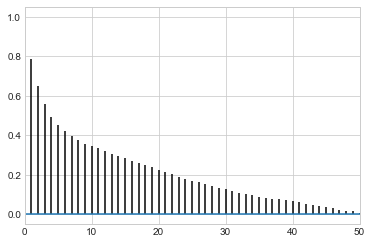

In [60]:
corrplot(samps)

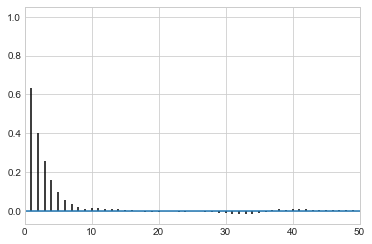

In [61]:
corrplot(samps[20000::]);

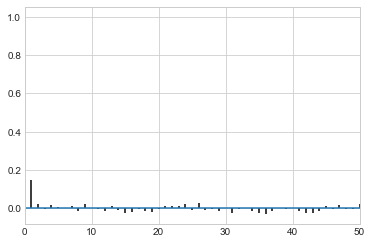

In [62]:
corrplot(samps[20000::4]);

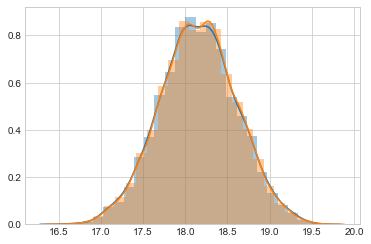

In [63]:
sns.distplot(samps[20000::4], bins=25);
sns.distplot(samps[20000::], bins=25);

In [64]:
like_samples = norm.rvs(loc = mu_data, scale=sig, size=5000)
post_samples = samps[20000::4]
prior_samples = norm.rvs(loc = mu_prior, scale=tau, size=5000)

## Comparing distributions

We plot samples from the prior against those from the sampling distribution (likelihood considered as a distribution in $\theta$ and those from the posterior.

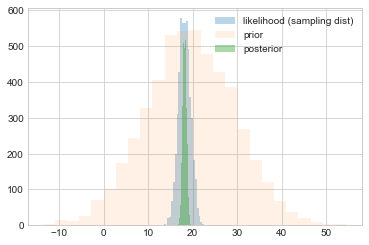

In [65]:
plt.hist(like_samples, bins=25, label="likelihood (sampling dist)", alpha=0.3)
plt.hist(prior_samples, bins=25, label="prior", alpha=0.1)
plt.hist(post_samples, bins=25, label="posterior", alpha=0.4)
plt.legend();

In [66]:
post_pred_func = lambda post: norm.rvs(loc = post, scale = sig)
post_pred_samples = post_pred_func(post_samples)

We then plot the posterior predictive against the sampling distribution. These are pretty close. Notice that both are wider than the distribution of the posterior, as they are distributions of $y$ rather than $\mu$. It just so happens that these distributions are on the scale so it makes sense to plot them together here and compare them.

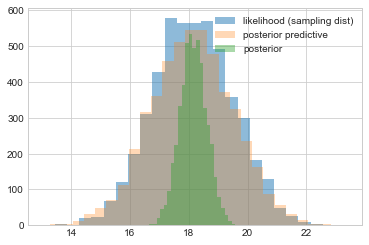

In [67]:
plt.hist(like_samples, bins=25, label="likelihood (sampling dist)", alpha=0.5)
plt.hist(post_pred_samples, bins=25, label="posterior predictive", alpha=0.3)
plt.hist(post_samples, bins=25, label="posterior", alpha=0.4)
plt.legend();

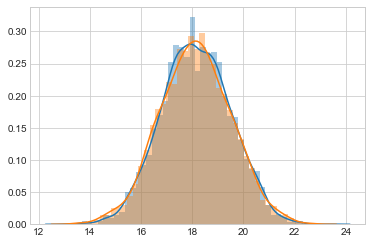

In [70]:
sns.distplot(like_samples);
sns.distplot(post_pred_samples);